In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans

## Data Import

In [2]:
import os

folder_path = 'Data/'

file_names = os.listdir(folder_path)

# List to store the lines of all files
content = []

# Iterate over the file names and read the lines of each text file
for file_name in file_names:
    # Check if the file is a text file
    if file_name.endswith('.txt'): 
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            lines = file.readlines()
            content.extend([(file_name, line) for line in lines])

pockets = [element[0] for element in content]
content = [element[1] for element in content]

key_values = np.array([])
result = {}

for l, p in zip(content, pockets):
    l = l.replace('\n', '').replace('\t', '')
    if 'Pocket' in l:
        pass
    else:
        key_values = np.append(key_values,l)
        key_values = np.append(key_values,p)

columns = np.array([])
values = np.array([])
pockets = np.array([])

for kv in key_values:
    if 'txt' in kv:
        pockets = np.append(pockets,kv)
        
    if len(kv.split(":")) >= 2:
        columns = np.append(columns,kv.split(":")[0])
        values = np.append(values,kv.split(":")[1])
        
columns = columns[0:19]
columns = columns.tolist()
df = pd.DataFrame(columns=columns)

for i, value in enumerate(values):
    column_index = i % len(columns)
    df.loc[i // len(columns), columns[column_index]] = value

df['Pocket'] = pockets[19::20]
df['Pocket'] = df['Pocket'].str.replace('_info.txt', '', regex=True)

df

,Score,Druggability Score,Number of Alpha Spheres,Total SASA,Polar SASA,Apolar SASA,Volume,Mean local hydrophobic density,Mean alpha sphere radius,Mean alp. sph. solvent access,Apolar alpha sphere proportion,Hydrophobicity score,Volume score,Polarity score,Charge score,Proportion of polar atoms,Alpha sphere density,Cent. of mass - Alpha Sphere max dist,Flexibility,Pocket
0,0.396,0.550,48,3.373,2.165,1.208,245.726,29.000,3.834,0.459,0.625,33.857,4.214,6,-2,28.571,3.012,7.503,0.029,5RGF
1,0.376,0.583,48,4.558,2.143,2.415,237.670,31.000,3.836,0.465,0.667,29.000,3.923,5,-2,29.630,2.851,6.562,0.058,5RGF
2,0.086,0.831,60,177.285,47.277,130.008,625.848,28.108,3.830,0.491,0.617,22.000,4.250,11,-3,36.585,6.245,14.046,0.117,5RGF
3,0.078,0.001,34,83.977,45.333,38.644,354.790,4.000,3.942,0.458,0.147,6.500,3.600,5,0,58.333,3.591,10.032,0.189,5RGF
4,0.066,0.007,18,49.856,7.589,42.267,197.121,12.000,3.857,0.635,0.722,-21.000,2.667,5,-1,38.889,2.689,5.431,0.115,5RGF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,-0.034,0.000,20,98.159,45.023,53.136,334.788,4.000,3.908,0.617,0.250,21.286,4.857,6,-2,36.842,3.071,7.624,0.449,4URL
453,-0.038,0.001,15,88.368,18.325,70.042,304.144,7.000,4.036,0.421,0.533,35.143,5.143,4,3,28.571,2.975,5.883,0.890,4URL
454,-0.051,0.000,34,174.814,108.394,66.420,387.547,0.667,3.884,0.444,0.088,4.643,2.714,6,-3,53.571,5.160,11.212,0.671,4URL
455,-0.054,0.083,36,137.823,37.590,100.233,413.010,22.000,4.124,0.528,0.639,8.600,4.600,7,1,36.000,3.551,8.207,0.448,4URL


## Druggability Score Distribution

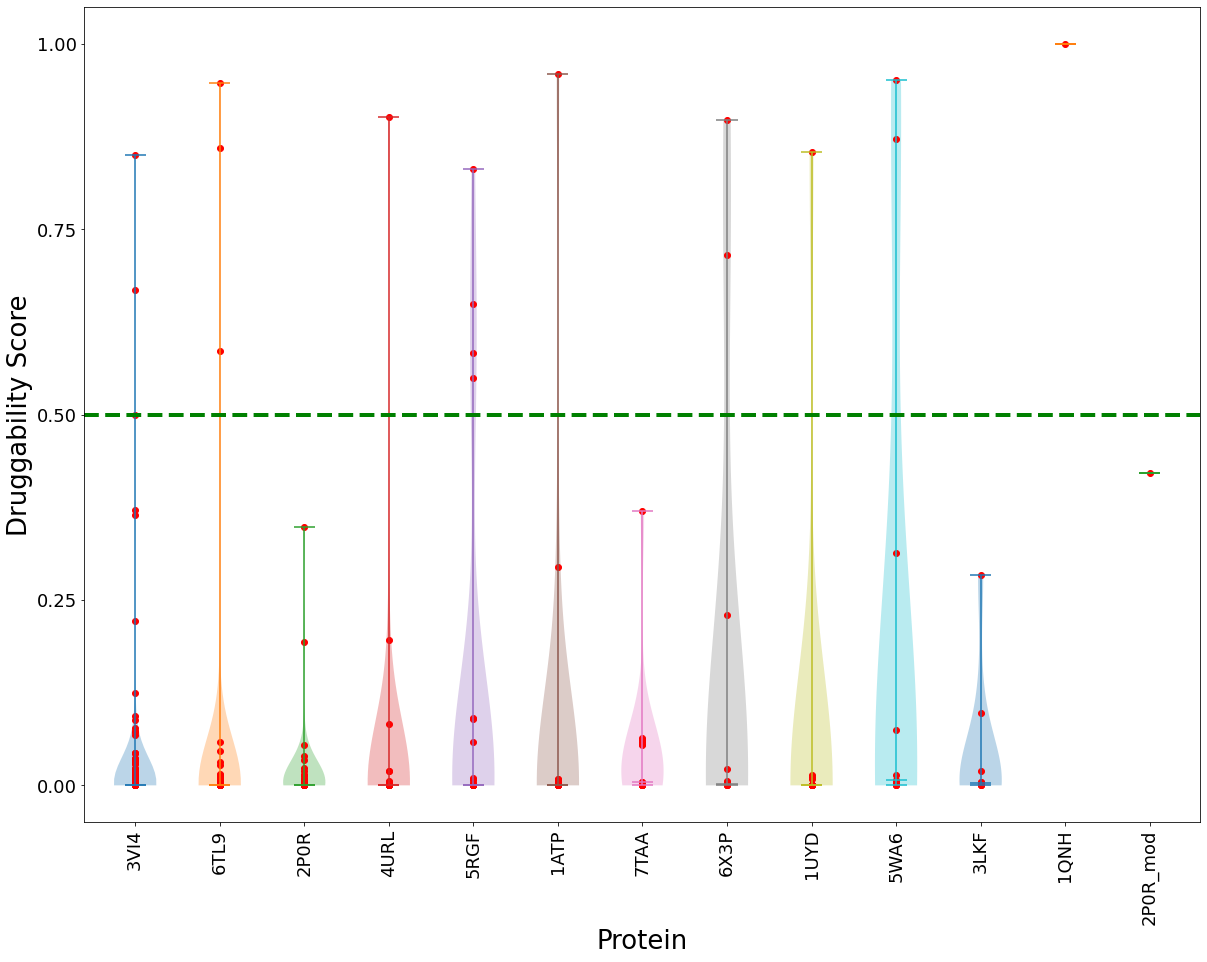

In [3]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Pocket' and count the number of rows for each pocket
pocket_counts = df['Pocket'].value_counts()

# Create a list to store the x-axis values (pocket names)
pockets = []

# Create a list to store the y-axis values (druggability scores)
scores = []

# Iterate over each unique pocket name and retrieve the corresponding druggability scores
for pocket in pocket_counts.index:
    pockets.extend([pocket] * pocket_counts[pocket])
    pocket_scores = df.loc[df['Pocket'] == pocket, 'Druggability Score '].astype(float).tolist()
    scores.extend(pocket_scores)

# Set the figsize to (20, 15)
plt.figure(figsize=(20, 15))

# Create a list to store the violin plot artists
violin_artists = []

# Iterate over each unique pocket name and create a violin plot
for i, pocket in enumerate(pocket_counts.index):
    pocket_scores = df.loc[df['Pocket'] == pocket, 'Druggability Score '].astype(float).tolist()
    
    # Create the violin plot for the current pocket
    violin = plt.violinplot([pocket_scores], positions=[i], showmedians=True)
    violin_artists.append(violin['bodies'][0])  # Store the violin body artist

# Set the x-axis tick labels
plt.xticks(range(len(pocket_counts.index)), pocket_counts.index)

# Set labels for the x and y axes
plt.xlabel('Pocket')
plt.ylabel('Druggability Score')

# Add horizontal lines at 0.74 and 0.25
plt.axhline(y=0.5, color='green', linestyle='--', linewidth=4)

# Rotate the x-axis labels for better visibility (optional)
plt.xticks(rotation=90)

# Set the y-axis ticks to 0, 0.25, 0.5, 0.75, and 1
plt.yticks([0, 0.25, 0.5, 0.75, 1])

# Create the scatter plot
plt.scatter(pockets, scores, color='red')

# Create legend handles for the violin plots
legend_handles = []
for i in range(len(violin_artists)):
    if len(violin_artists[i].get_edgecolor()) > 0:
        handle = plt.Line2D([0], [0], color=violin_artists[i].get_edgecolor()[0])
        legend_handles.append(handle)

# Iterate over each unique pocket and add the mean and std range
for i, pocket in enumerate(pocket_counts.index):
    pocket_scores = df.loc[df['Pocket'] == pocket, 'Druggability Score '].astype(float).tolist()

# Set the x-axis tick labels
plt.xticks(range(len(pocket_counts.index)), pocket_counts.index)

# Set labels for the x and y axes with larger font size
plt.xlabel('Protein', fontsize=26)
plt.ylabel('Druggability Score', fontsize=26)

# Set the x-axis tick labels with larger font size
plt.xticks(range(len(pocket_counts.index)), pocket_counts.index, fontsize=12)

# Set the y-axis tick labels with larger font size
plt.yticks([0, 0.25, 0.5, 0.75, 1], fontsize=18)

# Set the y-axis tick labels with larger font size
plt.xticks(fontsize=18)

# Show the plot
plt.show()


## Number of pockets vs druggability

In [4]:
df['Number of Pockets'] = df.groupby('Pocket')['Pocket'].transform('count')

df[df['Pocket'] == '1QNH']

,Score,Druggability Score,Number of Alpha Spheres,Total SASA,Polar SASA,Apolar SASA,Volume,Mean local hydrophobic density,Mean alpha sphere radius,Mean alp. sph. solvent access,...,Hydrophobicity score,Volume score,Polarity score,Charge score,Proportion of polar atoms,Alpha sphere density,Cent. of mass - Alpha Sphere max dist,Flexibility,Pocket,Number of Pockets
34,5.845,1.000,217,319.981,172.651,147.331,5091.737,13.444,4.302,0.583,...,16.815,3.889,16,6,43.262,29.044,66.371,0.000,1QNH,1


In [5]:
df['Druggability Score '] = df['Druggability Score '].astype(float)

## Correlation Matrix

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

subset_df = df.drop('Pocket', axis=1)

subset_df = subset_df.astype(float)


In [20]:
subset_df

,Score,Druggability Score,Number of Alpha Spheres,Total SASA,Polar SASA,Apolar SASA,Volume,Mean local hydrophobic density,Mean alpha sphere radius,Mean alp. sph. solvent access,Apolar alpha sphere proportion,Hydrophobicity score,Volume score,Polarity score,Charge score,Proportion of polar atoms,Alpha sphere density,Cent. of mass - Alpha Sphere max dist,Flexibility,Number of Pockets
0,0.396,0.550,48.0,3.373,2.165,1.208,245.726,29.000,3.834,0.459,0.625,33.857,4.214,6.0,-2.0,28.571,3.012,7.503,0.029,24.0
1,0.376,0.583,48.0,4.558,2.143,2.415,237.670,31.000,3.836,0.465,0.667,29.000,3.923,5.0,-2.0,29.630,2.851,6.562,0.058,24.0
2,0.086,0.831,60.0,177.285,47.277,130.008,625.848,28.108,3.830,0.491,0.617,22.000,4.250,11.0,-3.0,36.585,6.245,14.046,0.117,24.0
3,0.078,0.001,34.0,83.977,45.333,38.644,354.790,4.000,3.942,0.458,0.147,6.500,3.600,5.0,0.0,58.333,3.591,10.032,0.189,24.0
4,0.066,0.007,18.0,49.856,7.589,42.267,197.121,12.000,3.857,0.635,0.722,-21.000,2.667,5.0,-1.0,38.889,2.689,5.431,0.115,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,-0.034,0.000,20.0,98.159,45.023,53.136,334.788,4.000,3.908,0.617,0.250,21.286,4.857,6.0,-2.0,36.842,3.071,7.624,0.449,31.0
453,-0.038,0.001,15.0,88.368,18.325,70.042,304.144,7.000,4.036,0.421,0.533,35.143,5.143,4.0,3.0,28.571,2.975,5.883,0.890,31.0
454,-0.051,0.000,34.0,174.814,108.394,66.420,387.547,0.667,3.884,0.444,0.088,4.643,2.714,6.0,-3.0,53.571,5.160,11.212,0.671,31.0
455,-0.054,0.083,36.0,137.823,37.590,100.233,413.010,22.000,4.124,0.528,0.639,8.600,4.600,7.0,1.0,36.000,3.551,8.207,0.448,31.0


In [22]:
subset_df = subset_df[['Druggability Score ', 'Number of Alpha Spheres ','Polarity score', 'Mean local hydrophobic density ','Hydrophobicity score','Charge score ', 'Total SASA ','Volume ', 'Flexibility ']]

subset_df

,Druggability Score,Number of Alpha Spheres,Polarity score,Mean local hydrophobic density,Hydrophobicity score,Charge score,Total SASA,Volume,Flexibility
0,0.550,48.0,6.0,29.000,33.857,-2.0,3.373,245.726,0.029
1,0.583,48.0,5.0,31.000,29.000,-2.0,4.558,237.670,0.058
2,0.831,60.0,11.0,28.108,22.000,-3.0,177.285,625.848,0.117
3,0.001,34.0,5.0,4.000,6.500,0.0,83.977,354.790,0.189
4,0.007,18.0,5.0,12.000,-21.000,-1.0,49.856,197.121,0.115
...,...,...,...,...,...,...,...,...,...
452,0.000,20.0,6.0,4.000,21.286,-2.0,98.159,334.788,0.449
453,0.001,15.0,4.0,7.000,35.143,3.0,88.368,304.144,0.890
454,0.000,34.0,6.0,0.667,4.643,-3.0,174.814,387.547,0.671
455,0.083,36.0,7.0,22.000,8.600,1.0,137.823,413.010,0.448


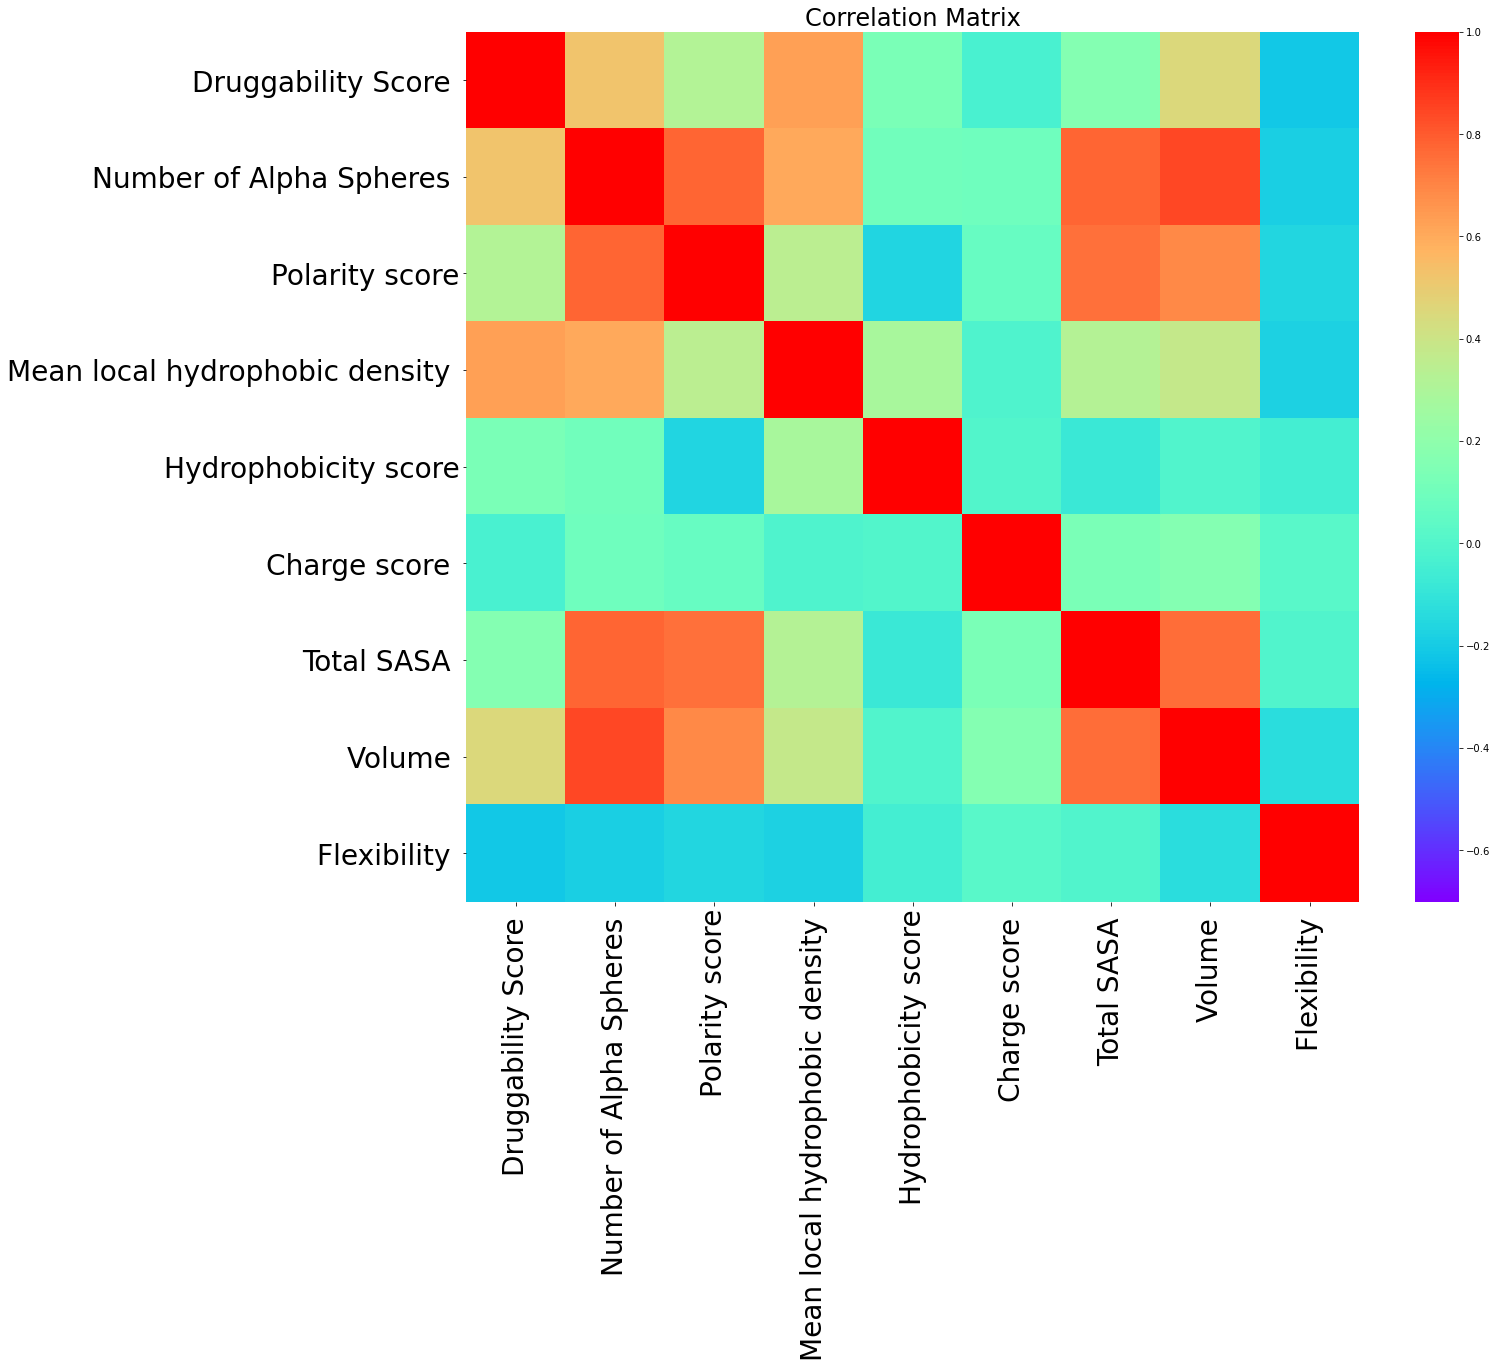

In [23]:
plt.figure(figsize=(20, 16))

# Generate the correlation matrix and plot the heatmap
correlation_matrix = subset_df.corr()
heatmap = sns.heatmap(correlation_matrix, cmap='rainbow', vmin=-0.7, vmax=1)

# Triple the font size of the axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=28)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=28)

plt.title('Correlation Matrix', fontsize=24)

plt.show()

## Druggability Score Analysis

In [9]:
subset_df['Pocket'] = df['Pocket']
df = subset_df
df.drop('Pocket', axis=1, inplace=True)

high_drug_score = df[df['Druggability Score '] >= 0.5]
low_drug_score = df[df['Druggability Score '] < 0.5]

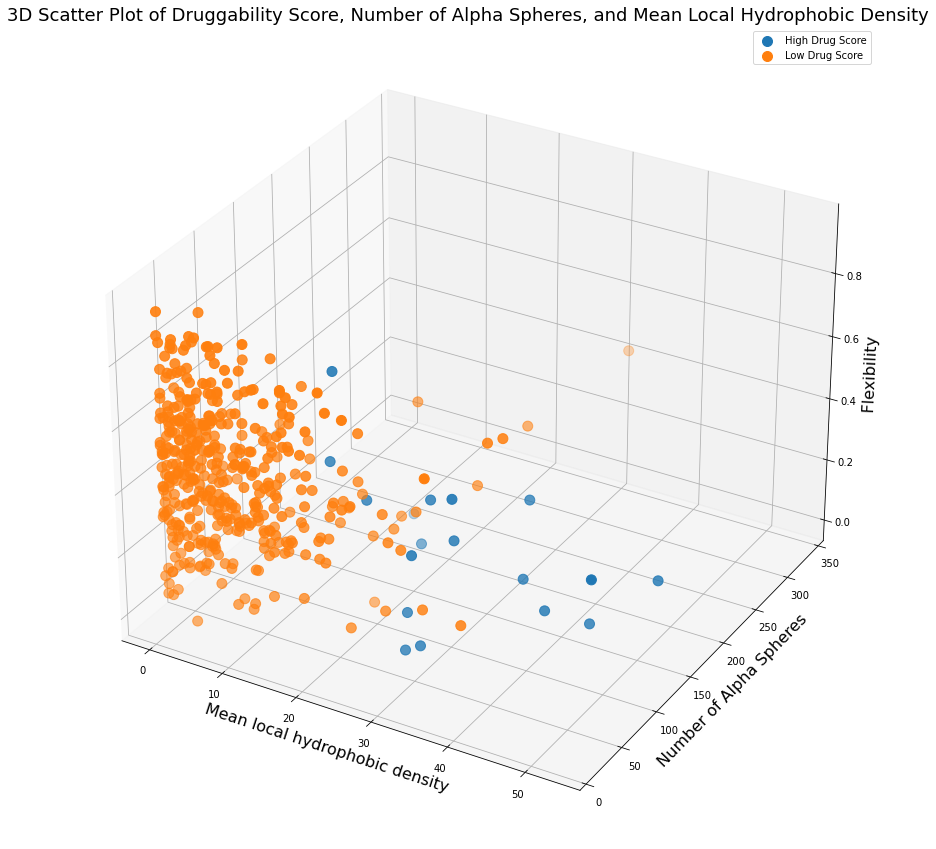

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

feature1 = 'Mean local hydrophobic density '
feature2 = 'Number of Alpha Spheres '
feature3 = 'Flexibility '

# Add the scatter plots for high_drug_score
ax.scatter(high_drug_score[feature1], high_drug_score[feature2], high_drug_score[feature3], label='High Drug Score', s=100)

# Add the scatter plots for low_drug_score
ax.scatter(low_drug_score[feature1], low_drug_score[feature2], low_drug_score[feature3], label='Low Drug Score', s=100)

ax.set_xlabel(feature1, fontsize=16)  # Increase the font size
ax.set_ylabel(feature2, fontsize=16)  # Increase the font size
ax.set_zlabel(feature3, fontsize=16)  # Increase the font size
ax.set_title('3D Scatter Plot of Druggability Score, Number of Alpha Spheres, and Mean Local Hydrophobic Density', fontsize=18)  # Increase the font size
ax.legend()

plt.show()


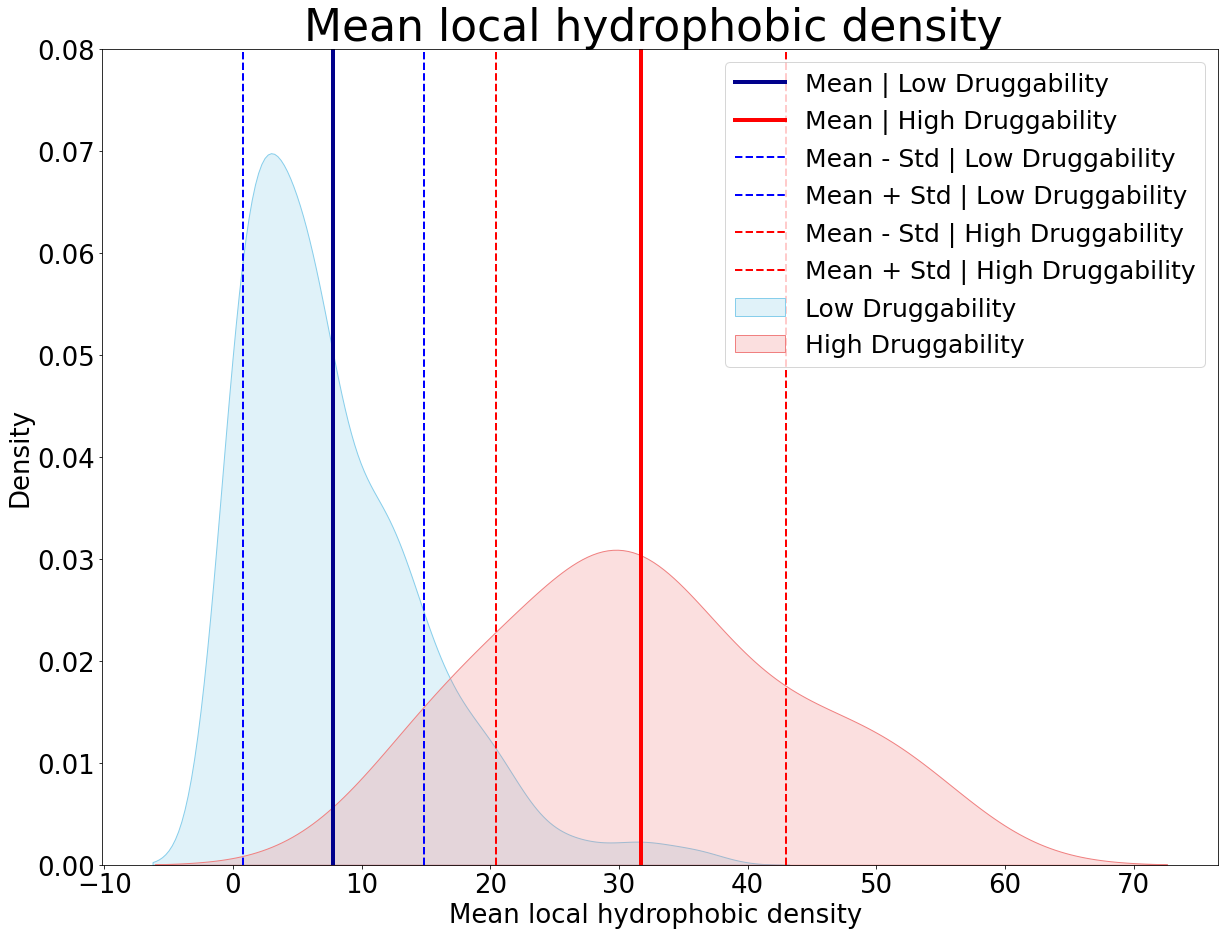

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

low_f = low_drug_score[feature1]
high_f = high_drug_score[feature1]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the smoothed distributions as normalized density distributions
sns.kdeplot(low_f, label='Low Druggability', color='skyblue', shade=True)
sns.kdeplot(high_f, label='High Druggability', color='lightcoral', shade=True)

# Calculate and plot the mean values
low_f_mean = np.mean(low_f)
high_f_mean = np.mean(high_f)

ax.axvline(low_f_mean, color='darkblue', linewidth=4, label='Mean | Low Druggability')
ax.axvline(high_f_mean, color='red', linewidth=4, label='Mean | High Druggability')

# Calculate and plot the standard deviation lines
low_f_std = np.std(low_f)
high_f_std = np.std(high_f)

ax.axvline(low_f_mean - low_f_std, color='blue', linestyle='dashed', linewidth=2, label='Mean - Std | Low Druggability')
ax.axvline(low_f_mean + low_f_std, color='blue', linestyle='dashed', linewidth=2, label='Mean + Std | Low Druggability')
ax.axvline(high_f_mean - high_f_std, color='red', linestyle='dashed', linewidth=2, label='Mean - Std | High Druggability')
ax.axvline(high_f_mean + high_f_std, color='red', linestyle='dashed', linewidth=2, label='Mean + Std | High Druggability')

# Customize the appearance
ax.set_xlabel(feature1, fontsize=26)
ax.set_ylabel('Density', fontsize=26)
ax.tick_params(axis='both', which='major', labelsize=26)
ax.legend(fontsize=25)
ax.set_ylim(0, 0.08)

plt.title(feature1, fontsize=44)

# Show the plot
plt.show()


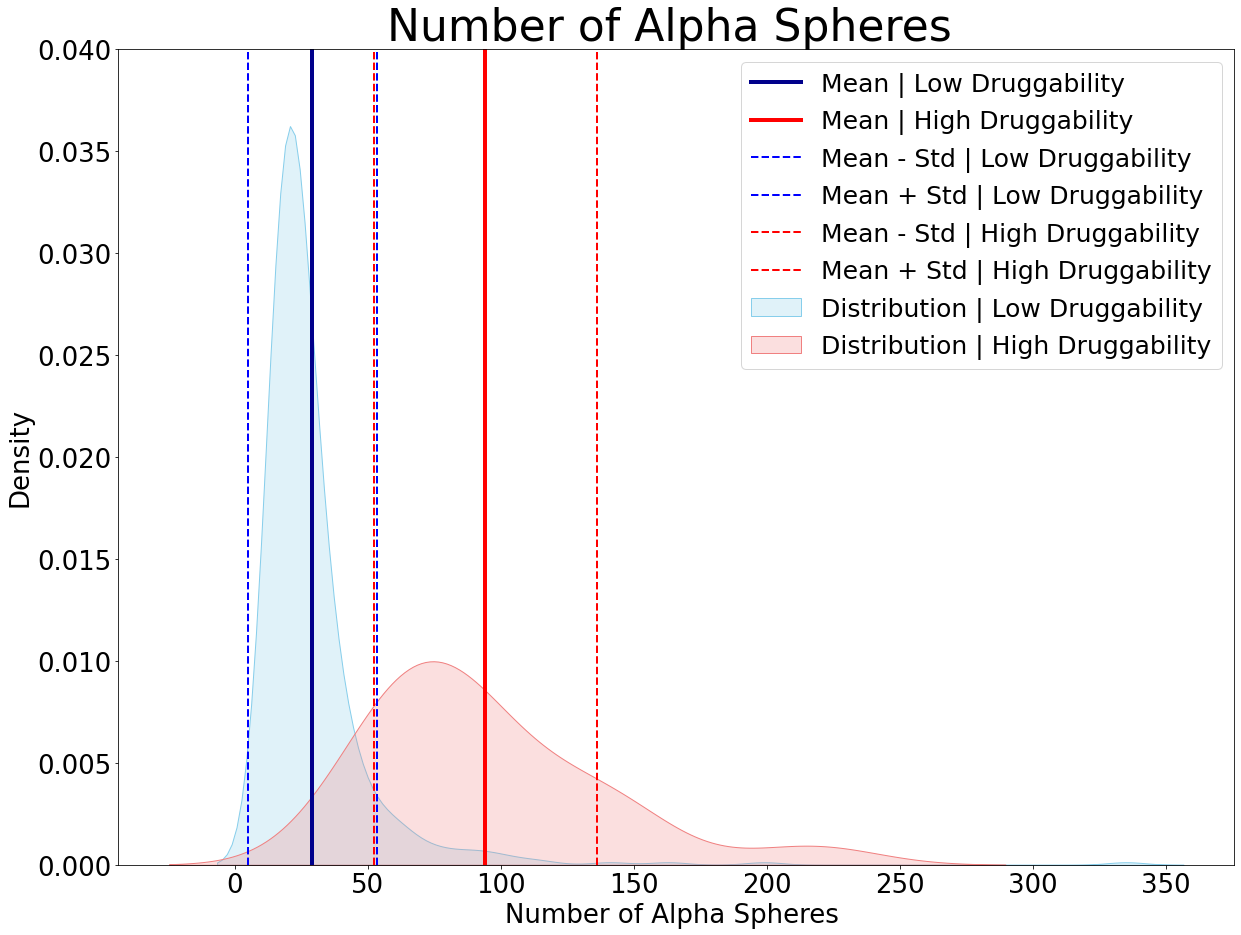

In [63]:
import seaborn as sns

low_f = low_drug_score[feature2]
high_f = high_drug_score[feature2]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the smoothed distributions
sns.kdeplot(low_f, label='Distribution | Low Druggability', color='skyblue', shade=True)
sns.kdeplot(high_f, label='Distribution | High Druggability', color='lightcoral', shade=True)

# Calculate and plot the mean values
low_f_mean = np.mean(low_f)
high_f_mean = np.mean(high_f)

ax.axvline(low_f_mean, color='darkblue', linewidth=4, label='Mean | Low Druggability')
ax.axvline(high_f_mean, color='red', linewidth=4, label='Mean | High Druggability')

# Calculate and plot the standard deviation lines
low_f_std = np.std(low_f)
high_f_std = np.std(high_f)

ax.axvline(low_f_mean - low_f_std, color='blue', linestyle='dashed', linewidth=2, label='Mean - Std | Low Druggability')
ax.axvline(low_f_mean + low_f_std, color='blue', linestyle='dashed', linewidth=2, label='Mean + Std | Low Druggability')
ax.axvline(high_f_mean - high_f_std, color='red', linestyle='dashed', linewidth=2, label='Mean - Std | High Druggability')
ax.axvline(high_f_mean + high_f_std, color='red', linestyle='dashed', linewidth=2, label='Mean + Std | High Druggability')

ax.set_xlabel(feature1, fontsize=26)
ax.set_ylabel(feature2, fontsize=26)

# Increase the font size of numbers on the x-axis and y-axis
ax.tick_params(axis='both', which='major', labelsize=26)

# Customize the appearance
ax.set_xlabel(feature2)
ax.set_ylabel('Density')
ax.legend(fontsize=25)  # Increase the legend font size

# Set y-axis limit
ax.set_ylim(0, 0.04)

plt.title(feature2, fontsize=44)

# Show the plot
plt.show()


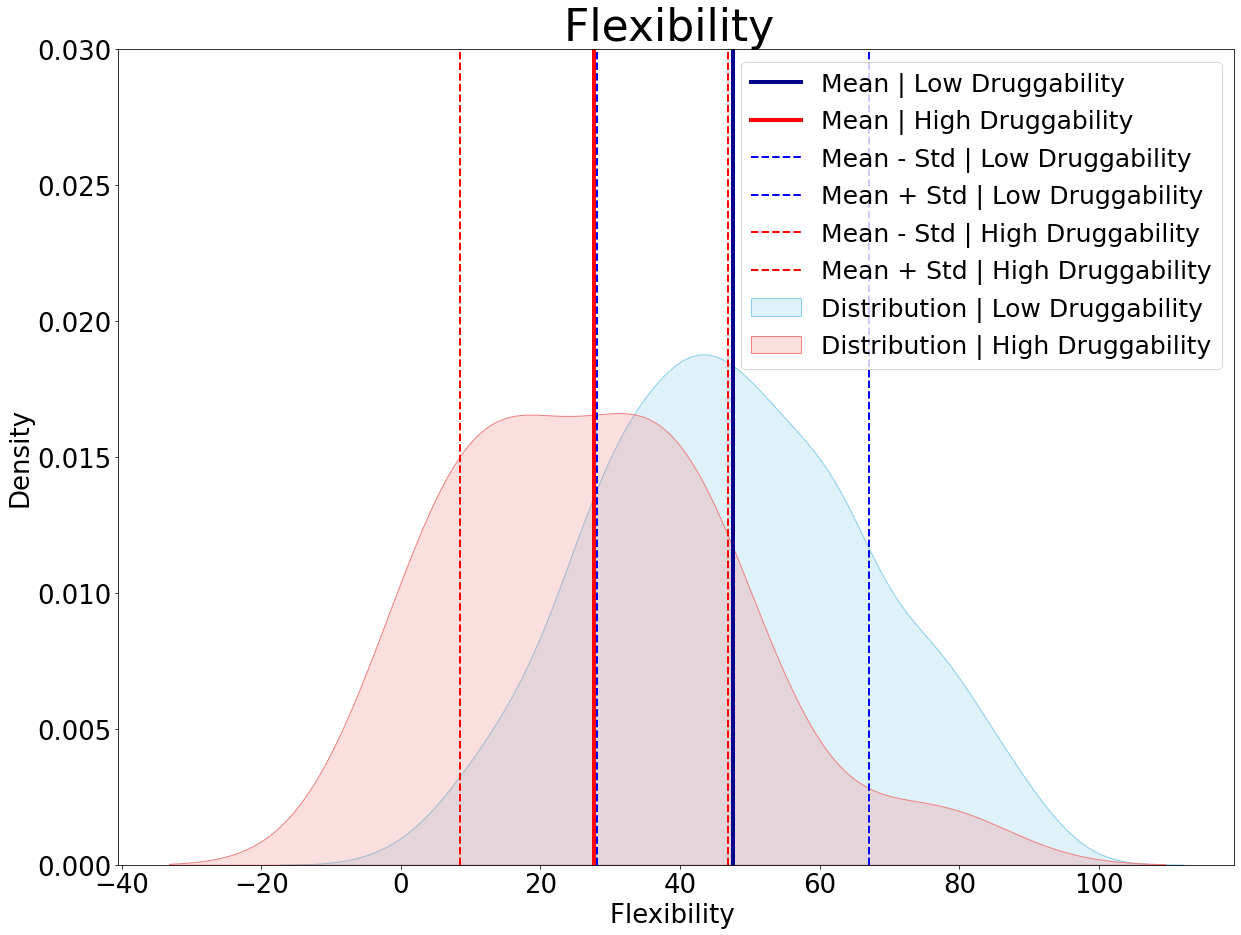

In [73]:
import seaborn as sns

low_f = low_drug_score[feature3]*100
high_f = high_drug_score[feature3]*100

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the smoothed distributions
sns.kdeplot(low_f, label='Distribution | Low Druggability', color='skyblue', shade=True)
sns.kdeplot(high_f, label='Distribution | High Druggability', color='lightcoral', shade=True)

# Calculate and plot the mean values
low_f_mean = np.mean(low_f)
high_f_mean = np.mean(high_f)

ax.axvline(low_f_mean, color='darkblue', linewidth=4, label='Mean | Low Druggability')
ax.axvline(high_f_mean, color='red', linewidth=4, label='Mean | High Druggability')

# Calculate and plot the standard deviation lines
low_f_std = np.std(low_f)
high_f_std = np.std(high_f)

ax.axvline(low_f_mean - low_f_std, color='blue', linestyle='dashed', linewidth=2, label='Mean - Std | Low Druggability')
ax.axvline(low_f_mean + low_f_std, color='blue', linestyle='dashed', linewidth=2, label='Mean + Std | Low Druggability')
ax.axvline(high_f_mean - high_f_std, color='red', linestyle='dashed', linewidth=2, label='Mean - Std | High Druggability')
ax.axvline(high_f_mean + high_f_std, color='red', linestyle='dashed', linewidth=2, label='Mean + Std | High Druggability')

ax.set_xlabel(feature1, fontsize=26)
ax.set_ylabel(feature2, fontsize=26) 

# Increase the font size of numbers on the x-axis and y-axis
ax.tick_params(axis='both', which='major', labelsize=26)

# Customize the appearance
ax.set_xlabel(feature3)
ax.set_ylabel('Density')
ax.legend(fontsize=25)  # Increase the legend font size

# Set y-axis limit
ax.set_ylim(0, 0.03)

plt.title(feature3, fontsize=44)

# Show the plot
plt.show()


## ML

In [80]:
random_rows = low_drug_score.sample(n=50, random_state=42)
balanced_df = pd.concat([high_drug_score, random_rows], ignore_index=True)
cols = list(balanced_df.columns)
cols = [value for value in cols if value != 'Score ']
balanced_df = balanced_df[cols]
balanced_df['Druggability Score '] = balanced_df['Druggability Score '].apply(lambda x: 1 if x > 0.5 else 0)
balanced_df

,Druggability Score,Mean local hydrophobic density,Hydrophobicity score,Number of Alpha Spheres,Total SASA,Volume,Flexibility
0,1,29.000,33.857,48.0,3.373,245.726,0.029
1,1,31.000,29.000,48.0,4.558,237.670,0.058
2,1,28.108,22.000,60.0,177.285,625.848,0.117
3,1,22.111,2.368,140.0,403.294,1478.714,0.124
4,1,13.444,16.815,217.0,319.981,5091.737,0.000
...,...,...,...,...,...,...,...
63,0,0.000,53.556,22.0,49.935,192.686,0.461
64,0,17.400,5.615,35.0,141.921,342.306,0.523
65,0,17.944,40.278,73.0,184.138,607.796,0.302
66,0,8.000,18.077,37.0,73.315,223.820,0.277


Accuracy: 0.9285714285714286
Precision: 0.8571428571428571
Recall: 1.0
F1 Score: 0.923076923076923
Difference between actual and predicted values:
46    0
16    0
4     0
9     0
28    0
41    0
58    0
5     0
61    0
12    0
25    0
65   -1
47    0
0     0
Name: Druggability Score , dtype: int64


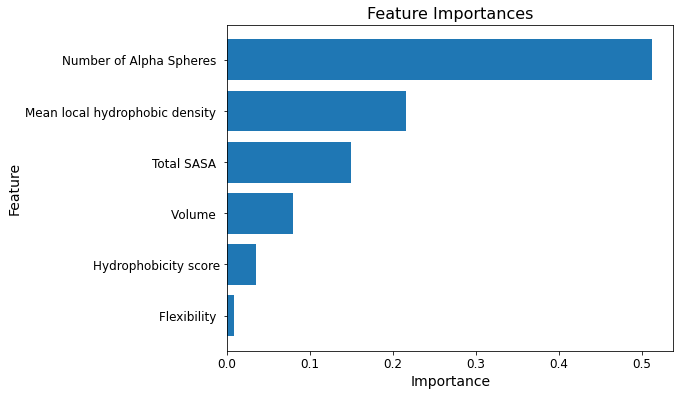

In [81]:
train, test = train_test_split(balanced_df, test_size=0.2) 
y_train, y_test = train['Druggability Score '], test['Druggability Score ']

y_train = np.sort(y_train)[::-1]
y_train = np.around(y_train, decimals=1)

y_test = np.sort(y_test)[::-1]
y_test = np.around(y_test, decimals=1)

X_train = train.drop('Druggability Score ', axis=1)
X_test = test.drop('Druggability Score ', axis=1)


# Split the data into features (X) and the target variable (y)
X = balanced_df.drop("Druggability Score ", axis=1)
y = balanced_df["Druggability Score "]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model with Gini criterion
rf = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate the difference between actual and predicted values
diff = y_test - y_pred

# Print the difference
print("Difference between actual and predicted values:")
print(diff)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)

# Set the font size for the axis labels and values
plt.rcParams.update({'font.size': 12})

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importances', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top
plt.show()


## K-means

In [88]:
from sklearn.inspection import permutation_importance

random_rows = low_drug_score.sample(n=50, random_state=42)
balanced_df = pd.concat([high_drug_score, random_rows], ignore_index=True)
cols = list(balanced_df.columns)
cols = [value for value in cols if value != 'Score ']
balanced_df = balanced_df[['Druggability Score ', 'Mean local hydrophobic density ', 'Number of Alpha Spheres ']]
balanced_df.loc[:, 'Druggability Score '] = balanced_df['Druggability Score '].apply(lambda x: 1 if x > 0.5 else 0)

# Split the data into features (X) and the target variable (y)
X = balanced_df.drop("Druggability Score ", axis=1)
y = balanced_df["Druggability Score "]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into features (X)
X_train = balanced_df.drop("Druggability Score ", axis=1)

# Create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X_train)
pred_y = kmeans.predict(X_test)

# Computing the percentage error of our algorithm
print('Loss: ', round(abs(y_test-(pred_y)).sum()/len(y_test)*100,2), '%\n')

# Getting the center of the clusters
cent=kmeans.cluster_centers_
for i in range(0,np.shape(cent)[1]):
    print("Center of ", X_train.columns[i], ": Low Druggability =", round(cent[0][i],2) , "| High Druggability =", round(cent[1][i],2))

Loss:  14.29 %

Center of  Mean local hydrophobic density  : Low Druggability = 8.47 | High Druggability = 31.45
Center of  Number of Alpha Spheres  : Low Druggability = 27.38 | High Druggability = 104.0


<ipython-input-89-a9313f10947d>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


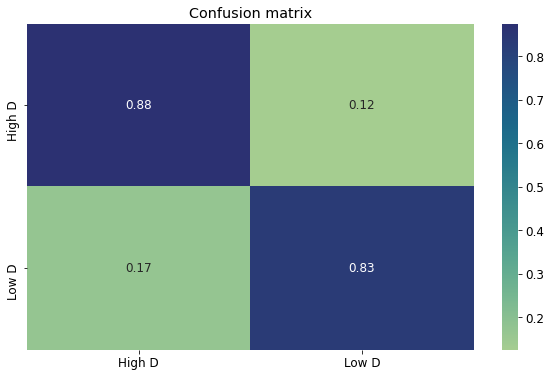

In [89]:
u, counts = np.unique(y_test, return_counts=True)

import seaborn as sn
plt.figure(figsize=(10,6))
plt.title('Confusion matrix')

sn.heatmap(metrics.confusion_matrix(y_test, pred_y)/counts[:,None], cmap='crest', annot=True);
ax = plt.subplot()
ax.xaxis.set_ticklabels(['High D', 'Low D']); 
ax.yaxis.set_ticklabels(['High D', 'Low D']);

## Cluster Visualization

In [58]:
dflow=low_drug_score[['Mean local hydrophobic density ', 'Number of Alpha Spheres ']]
dfhigh=high_drug_score[['Mean local hydrophobic density ', 'Number of Alpha Spheres ']]

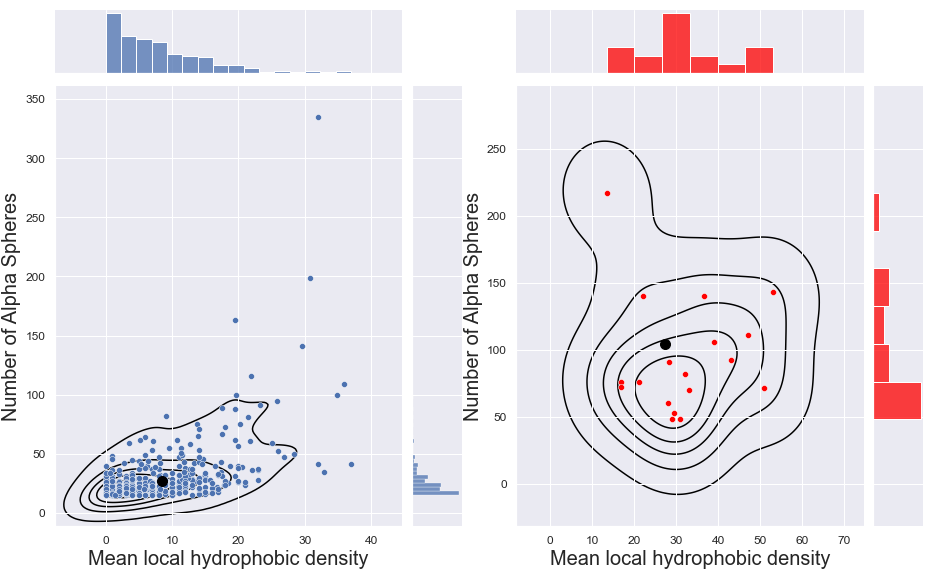

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h = self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())
        

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

sns.set(style="darkgrid")

# Plot for dflow
g0 = sns.jointplot(data=dflow, x='Mean local hydrophobic density ', y='Number of Alpha Spheres ')
g0.plot_joint(sns.kdeplot, color="black", zorder=0, levels=6)

# Plot for dfhigh
g1 = sns.jointplot(data=dfhigh, x='Mean local hydrophobic density ', y='Number of Alpha Spheres ', color='red')
g1.plot_joint(sns.kdeplot, color="black", zorder=0, levels=6)

# Create a new figure and grid
fig = plt.figure(figsize=(13, 8))
gs = gridspec.GridSpec(1, 2)

# Add the plots to the grid
mg0 = SeabornFig2Grid(g0, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])

# Add specific points to the plot
x1, y1 = round(cent[0][0],2), round(cent[0][1],2)  # First point coordinates
x2, y2 = round(cent[0][1],2), round(cent[1][1],2)  # Second point coordinates
point_size = 100  # Customize the size of the points

mg0.sg.ax_joint.scatter(x1, y1, color='black', s=point_size)
mg1.sg.ax_joint.scatter(x2, y2, color='black', s=point_size)

# Adjust the layout and display the figure
gs.tight_layout(fig)

# Increase the font size of the axis labels
mg0.sg.ax_joint.set_xlabel('Mean local hydrophobic density', fontsize=20)
mg0.sg.ax_joint.set_ylabel('Number of Alpha Spheres', fontsize=20)

# Increase the font size of the axis labels
mg1.sg.ax_joint.set_xlabel('Mean local hydrophobic density', fontsize=20)
mg1.sg.ax_joint.set_ylabel('Number of Alpha Spheres', fontsize=20)

# Increase the font size of numbers on the x-axis and y-axis
mg0.sg.ax_joint.tick_params(axis='both', which='major', labelsize=12)
mg1.sg.ax_joint.tick_params(axis='both', which='major', labelsize=12)

plt.show()


## Visualization of High vs Low Voxellized protein pocket space

In [65]:
def min_max_center_margin():
    
    x_min = min(pocket_1['x']-pocket_1['r'])
    y_min = min(pocket_1['y']-pocket_1['r'])
    z_min = min(pocket_1['z']-pocket_1['r'])

    x_max = max(pocket_1['x']+pocket_1['r'])
    y_max = max(pocket_1['y']+pocket_1['r'])
    z_max = max(pocket_1['z']+pocket_1['r'])

    xyz_min = np.array([x_min,y_min,z_min])

    xyz_max = np.array([x_max,y_max,z_max])
    
    L = 5

    xyz_min_L = np.array([i - L for i in xyz_min])
    xyz_max_L = np.array([i + L for i in xyz_max])
    
    # Calculate the center point
    center = (xyz_min_L + xyz_max_L) / 2
    
    return xyz_min, xyz_min_L, xyz_max, xyz_max_L, L, center

def compute_grid(xyz_max_L, xyz_min_L):
    # boundaries of box
    xyz_min_value = int(min(xyz_min_L))
    xyz_max_value = int(max(xyz_max_L))

    # step size
    dX = 2

    # array dimension of box
    n = np.array([xyz_min_value + i*dX for i in range((xyz_max_value-xyz_min_value)//dX + 1)])

    coordinates = np.array([(i, j, l) for i in n for j in n for l in n])

    return coordinates

def voxelized_space(coordinates):
    
    X,Y,Z = pocket_1['x'],pocket_1['y'],pocket_1['z']

    # Combine the vectors into a matrix
    pocket_matrix = np.array([X, Y, Z]).T

    inside = []

    # Compare the elements of the two matrices
    for ind_p, p in enumerate(pocket_matrix):
        for ind, i in enumerate(coordinates):
            if np.abs(i - p)[0] < 1 and np.abs(i - p)[1] < 1 and np.abs(i - p)[2] < 1:
                inside.append([i,1])
            else:
                inside.append([i,0])

    # Extract the coordinates and values from the sublists
    coords = np.array([lst_elem[0] for lst_elem in inside])
    values = np.array([lst_elem[1] for lst_elem in inside])

    # Define the list of sphere radii
    radii = pocket_1['r']
    
    # Create a 3D scatter plot of the points with red for value 0 and blue for value 1
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(coords[values == 1, 0], coords[values == 1, 1], coords[values == 1, 2], c='b',s=200)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
    
    return coords, values, radii, inside

def inside_pocket(pocket_1):
    
    xyz_min, xyz_min_L, xyz_max, xyz_max_L, L, center = min_max_center_margin()
    
    coordinates = compute_grid(xyz_max_L, xyz_min_L)
    
    coords, values, radii, inside_matrix = voxelized_space(coordinates)
    
    inside_dict = {"coordinates": coords, "values": values, "radii": radii, "center": center, "margin": L, "maximum": xyz_max_L, "minimum": xyz_min_L}
    
    return inside_dict
    

## Load Low Druggability Pocket

In [61]:
filename = 'Data/5RGF_pockets.pqr'

with open(filename, 'r') as f:
    pqr_contents = f.read()

pqr_contents = pqr_contents.replace("HEADER\nHEADER This is a pqr format file writen by the programm fpocket.,,,, \nHEADER It contains all the pocket vertices found by fpocket.,,,,,","")

with open(filename.replace(".pqr", ".txt"), 'w') as f:
    f.write(pqr_contents)

filename_txt = filename.replace(".pqr", ".txt")

with open(filename_txt) as infile:
    # Read space-delimited file and replace all empty spaces by commas
    data = infile.read().replace('    ', ',')
    # Write the CSV data in the output file
    print(data, file=open(filename.replace(".pqr", ".txt"), 'w'))

In [62]:
filename = 'Data/5RGF_pockets.txt'

with open(filename, 'r') as f:
    pqr_contents = f.read()

pqr_contents = pqr_contents.replace("HEADER\nHEADER This is a pqr format file writen by the programm fpocket.,,,, \nHEADER It contains all the pocket vertices found by fpocket.,,,,,","")

with open(filename.replace(".pqr", ".txt"), 'w') as f:
    f.write(pqr_contents)

filename_txt = filename.replace(".pqr", ".txt")

with open(filename_txt) as infile:
    # Read space-delimited file and replace all empty spaces by commas
    data = infile.read().replace('    ', ',')
    # Write the CSV data in the output file
    print(data, file=open(filename.replace(".pqr", ".txt"), 'w'))

df = pd.read_csv(filename_txt, sep=',',header=None)
df.rename(columns = {0:'Type',1:'Atom ID',2:'Element',3:'Pocket ID',4:'xyz',5:'__',6:'r'}, inplace = True)

df.head()

x = []
y = []
z = []

for i in range(len(df)):

    dummy = str(df['xyz'][i]).split(' ')
    filtered_list = [item for item in dummy if item != '']
    filtered_list = [item for item in filtered_list if item != 'nan']
    
    if len(filtered_list) < 3:
        x.append([])
        y.append([])
        z.append([])
    else:
        x.append(float(filtered_list[0]))
        y.append(float(filtered_list[1]))
        z.append(float(filtered_list[2]))
    
df['x']=x
df['y']=y
df['z']=z
df.drop(['xyz', '__'], axis=1,inplace = True)

pocket_1 = df[df['Pocket ID'] == 6]

pocket_1.reset_index(drop=True, inplace=True)

In [63]:
pocket_1

,Type,Atom ID,Element,Pocket ID,r,x,y,z
0,ATOM,209.0,O STP,6.0,3.90,9.016,9.174,7.172
1,ATOM,210.0,C STP,6.0,3.50,8.833,8.583,6.546
2,ATOM,211.0,O STP,6.0,3.91,9.178,8.917,6.874
3,ATOM,212.0,O STP,6.0,3.86,9.32,8.56,6.832
4,ATOM,213.0,O STP,6.0,3.81,9.54,7.893,6.957
5,ATOM,214.0,O STP,6.0,3.73,9.867,6.802,8.205
6,ATOM,215.0,O STP,6.0,3.67,9.443,7.698,7.709
7,ATOM,216.0,C STP,6.0,3.69,9.792,6.775,8.314
8,ATOM,217.0,O STP,6.0,3.64,9.705,6.806,8.375
9,ATOM,218.0,C STP,6.0,3.64,9.809,6.607,8.301


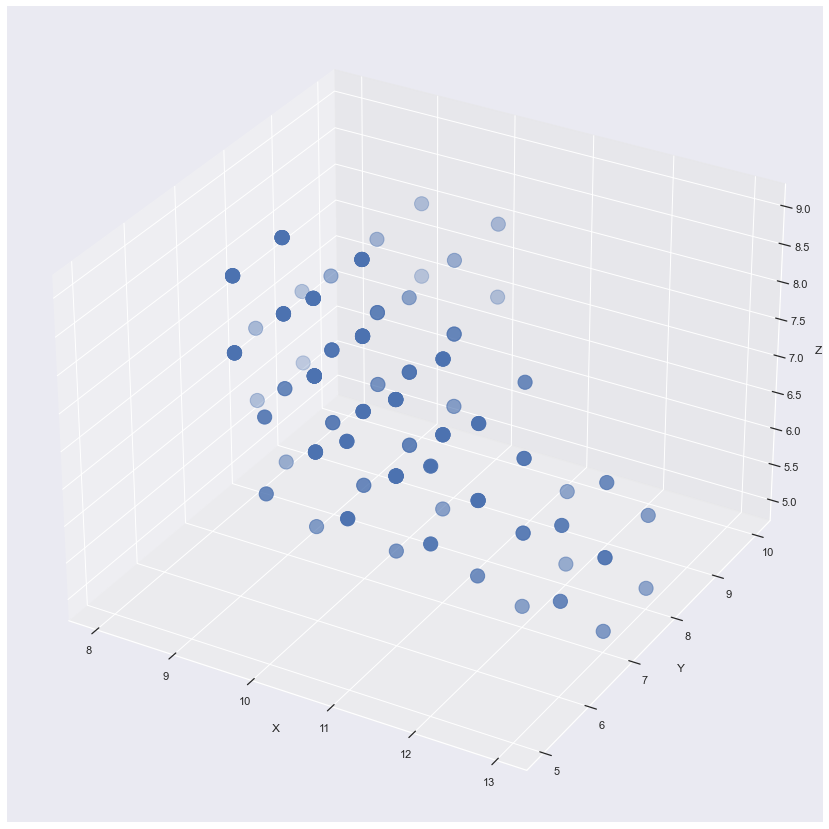

In [64]:
data_low = inside_pocket(pocket_1)

## Load High Druggability Pocket

In [66]:
filename = 'Data/1QNH_pockets.pqr'

with open(filename, 'r') as f:
    pqr_contents = f.read()

pqr_contents = pqr_contents.replace("HEADER\nHEADER This is a pqr format file writen by the programm fpocket.,,,, \nHEADER It contains all the pocket vertices found by fpocket.,,,,,","")

with open(filename.replace(".pqr", ".txt"), 'w') as f:
    f.write(pqr_contents)

filename_txt = filename.replace(".pqr", ".txt")

with open(filename_txt) as infile:
    # Read space-delimited file and replace all empty spaces by commas
    data = infile.read().replace('    ', ',')
    # Write the CSV data in the output file
    print(data, file=open(filename.replace(".pqr", ".txt"), 'w'))

In [67]:
filename = 'Data/1QNH_pockets.txt'

with open(filename, 'r') as f:
    pqr_contents = f.read()

pqr_contents = pqr_contents.replace("HEADER\nHEADER This is a pqr format file writen by the programm fpocket.,,,, \nHEADER It contains all the pocket vertices found by fpocket.,,,,,","")

with open(filename.replace(".pqr", ".txt"), 'w') as f:
    f.write(pqr_contents)

filename_txt = filename.replace(".pqr", ".txt")

with open(filename_txt) as infile:
    # Read space-delimited file and replace all empty spaces by commas
    data = infile.read().replace('    ', ',')
    # Write the CSV data in the output file
    print(data, file=open(filename.replace(".pqr", ".txt"), 'w'))

df = pd.read_csv(filename_txt, sep=',',header=None)
df.rename(columns = {0:'Type',1:'Atom ID',2:'Element',3:'Pocket ID',4:'xyz',5:'__',6:'r'}, inplace = True)

df.head()

x = []
y = []
z = []

for i in range(len(df)):

    dummy = str(df['xyz'][i]).split(' ')
    filtered_list = [item for item in dummy if item != '']
    filtered_list = [item for item in filtered_list if item != 'nan']
    
    if len(filtered_list) < 3:
        x.append([])
        y.append([])
        z.append([])
    else:
        x.append(float(filtered_list[0]))
        y.append(float(filtered_list[1]))
        z.append(float(filtered_list[2]))
    
df['x']=x
df['y']=y
df['z']=z
df.drop(['xyz', '__'], axis=1,inplace = True)

pocket_1 = df[df['Pocket ID'] == 1]

pocket_1.reset_index(drop=True, inplace=True)

In [68]:
pocket_1

,Type,Atom ID,Element,Pocket ID,r,x,y,z
0,ATOM,1.0,O STP,1.0,4.42,13.304,88.665,32.454
1,ATOM,2.0,C STP,1.0,3.53,9.417,86.428,34.234
2,ATOM,3.0,O STP,1.0,3.99,12.036,91.586,29.846
3,ATOM,4.0,O STP,1.0,5.48,12.345,91.637,32.679
4,ATOM,5.0,O STP,1.0,3.44,13.414,87.163,32.882
...,...,...,...,...,...,...,...,...
212,ATOM,213.0,O STP,1.0,3.65,26.006,42.758,14.37
213,ATOM,214.0,O STP,1.0,3.63,28.626,39.926,18.156
214,ATOM,215.0,O STP,1.0,5.05,30.514,38.191,17.4
215,ATOM,216.0,O STP,1.0,4.48,29.885,37.934,17.493


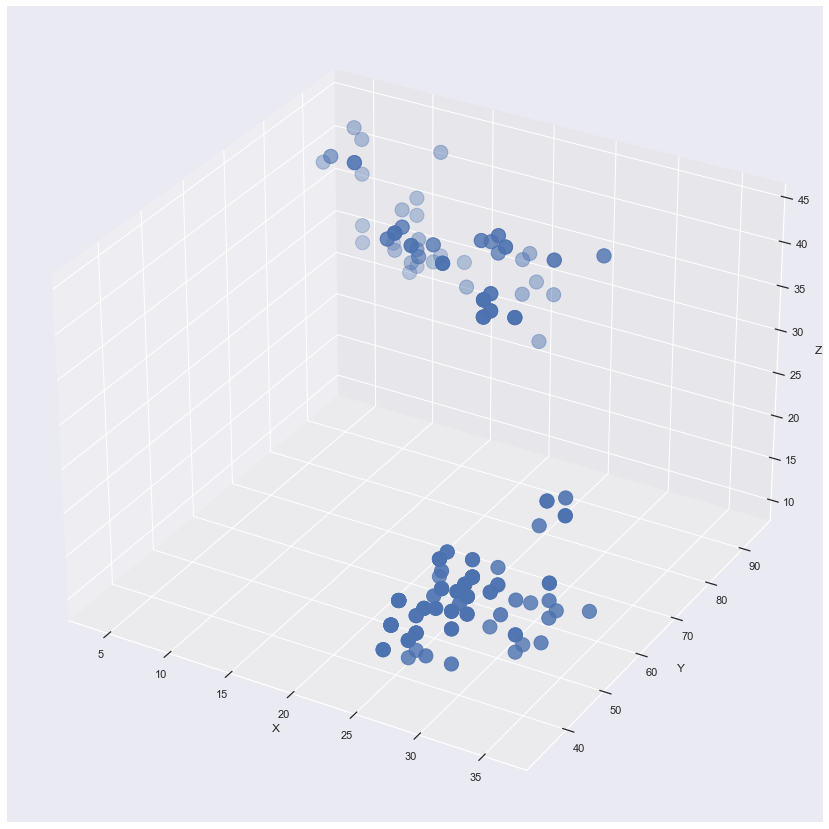

In [69]:
data = inside_pocket(pocket_1)

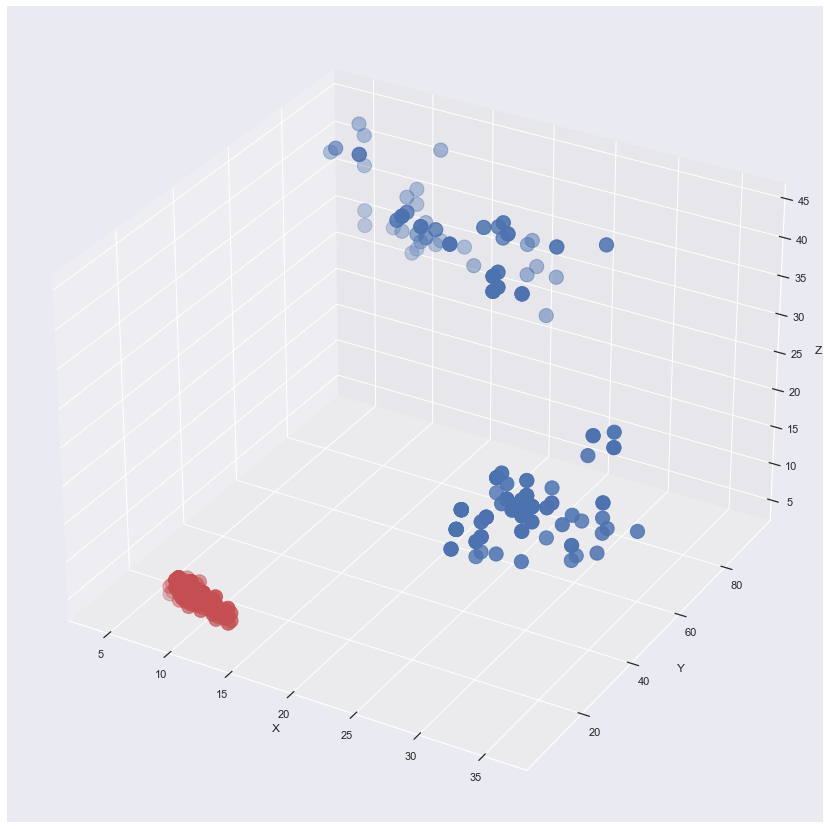

In [70]:
# Create a 3D scatter plot of the points with red for value 0 and blue for value 1
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['coordinates'][data['values'] == 1, 0], data['coordinates'][data['values'] == 1, 1], data['coordinates'][data['values'] == 1, 2], c='b',s=200)
ax.scatter(data_low['coordinates'][data_low['values'] == 1, 0], data_low['coordinates'][data_low['values'] == 1, 1], data_low['coordinates'][data_low['values'] == 1, 2], c='r',s=200)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()